Michael Kharkovski
CMPINF0010 Spring

## Introduction
- The goal of this project is to use a dataset from the WPRDC website and determine the best neighborhood from analyzing that dataset. This can be useful for individuals and families finding out where they may want to move as well as seeing where funding for playgrounds should be allocated.
## My Metric
- The metric I chose is playground count within a neighborhood. The reason I chose this is because I beleive that playgrounds play an essential role in the development of children. The wandering and exploration as well as interaction with others fosters and nurtures growth and curiosity. The dataset is located at https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367 .
## The Best Neightborhood
- Based upon the data, the 'best' neighborhood, aka the one with the most playgrounds, is **Squirrel Hill South** with eight playgrounds, followed by **Beechview** and **South Side Slopes**, each with five.

In [49]:
# import pandas and matplotlib
import pandas as pd
import matplotlib as mpl

In [48]:
# import dataset
dataset_url = 'https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367'
# create pandas dataframe from the csv file located at the URL
dataset = pd.read_csv(dataset_url)

In [50]:
# print the full dataset
dataset

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1199980206,Phillips Lower Playground,NaN,NaN,NaN,NaN,NaN,Carrick,4,29,42003290400,3,29,3,4-23,40.388144,-79.990309
121,2108783707,Duncan Park Playground,NaN,NaN,Duncan Park,DUNCAN ST,NaN,Upper Lawrenceville,7,10,42003101100,2,10,2,3-5,40.480246,-79.948461
122,675610013,McKinley Upper Playground,NaN,NaN,McKinley Park,MICHIGAN ST,NaN,Beltzhoover,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950
123,1683700344,Liberty Green Playground,NaN,NaN,Liberty Green Park,NaN,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462951,-79.919097


In [52]:
# we want to count up each occurence of a playground in a neighborhood
# define dict
playground_dict = {}
# loop through the dataset
for index, row in dataset.iterrows():
    # set name to be row
    name = row['neighborhood']
    # if the neighborhood is already in the dict, add 1 to the count
    if name in playground_dict.keys():
        playground_dict[name] += 1
    # if not, add it as an entry and set it to 1
    else:
        playground_dict[name] = 1
# print the dict
playground_dict



{'Beechview': 5,
 'Crawford-Roberts': 3,
 'Central Northside': 2,
 'Bedford Dwellings': 1,
 'South Side Slopes': 5,
 'South Side Flats': 2,
 'Lower Lawrenceville': 1,
 'Banksville': 1,
 'Homewood North': 1,
 'Bon Air': 1,
 'Central Oakland': 1,
 'Brighton Heights': 2,
 'Brookline': 2,
 'Hazelwood': 3,
 'Squirrel Hill South': 8,
 'Spring Garden': 1,
 'Lincoln-Lemington-Belmar': 2,
 'Windgap': 1,
 'Troy Hill': 2,
 'Westwood': 1,
 'Perry South': 1,
 'Homewood West': 1,
 'Allegheny Center': 4,
 'Strip District': 1,
 'Stanton Heights': 1,
 'Crafton Heights': 2,
 'West Oakland': 1,
 'East Carnegie': 1,
 'Duquesne Heights': 1,
 'East Liberty': 3,
 'Esplen': 1,
 'Fairywood': 1,
 'Highland Park': 4,
 'Upper Lawrenceville': 3,
 'Fineview': 1,
 'Regent Square': 1,
 'Garfield': 2,
 'Greenfield': 2,
 'South Oakland': 3,
 'Allentown': 1,
 'Hays': 1,
 'Elliott': 3,
 'Morningside': 2,
 'Terrace Village': 1,
 'Larimer': 1,
 'Carrick': 3,
 'Central Lawrenceville': 1,
 'Lincoln Place': 2,
 'Manchester': 

In [53]:
# for easier manipulation, create dataframe from dict
playground_dict_dataframe = pd.DataFrame.from_dict(playground_dict, orient='index', columns=['count'])
# print it out
playground_dict_dataframe

,count
Beechview,5
Crawford-Roberts,3
Central Northside,2
Bedford Dwellings,1
South Side Slopes,5
...,...
West End,1
Polish Hill,1
Point Breeze North,1
Squirrel Hill North,1


In [55]:
# sort the dataframe by descending order to see the top results
playground_dict_dataframe.sort_values('count', ascending=False)


,count
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Highland Park,4
Sheraden,4
...,...
Esplen,1
Fairywood,1
Regent Square,1
Allentown,1


<AxesSubplot:ylabel='Frequency'>

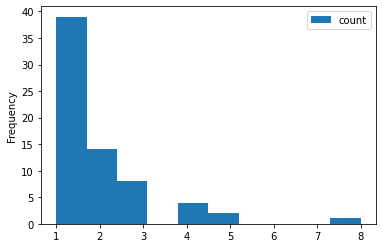

In [56]:
# as another interesting finding, plot a histogram of the frequency of playgrounds in neighborhoods
playground_dict_dataframe.plot.hist()

## Conclusion
- Squirrel Hill South ended up being the 'best' neighborhood according to the metric of playgrounds. This slightly differes from mine, Shadyside, but isn't too far off. I believe that playground count shows that a neighborhood is primarily focused towards families, not neccessary individuals or college students and such. This infrastructure is built to those who need it and as I am not the target demographic, it makes sense that it would not be favorable towards me.